In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset,DataLoader,TensorDataset

In [2]:
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [3]:
# Xavier初始化权重

def xavier(m):
    if type(m)==nn.Linear:
        nn.init.xavier_uniform_(m.weight)

class MyNet(nn.Module):
    def __init__(self,input_dim):
        super().__init__()
        self.f1=nn.Linear(input_dim,input_dim*8)
        self.drop1=nn.Dropout(p=0.2)
        self.s1=nn.ReLU()
        
        self.f2=nn.Linear(input_dim*8,input_dim*8)
        self.drop2=nn.Dropout(p=0.35)
        self.s2=nn.ReLU()
        
        self.f3=nn.Linear(input_dim*8,input_dim*8)
        self.drop3=nn.Dropout(p=0.5)
        self.s3=nn.ReLU()    
        
        self.f4=nn.Linear(input_dim*8,input_dim*8)
        self.drop4=nn.Dropout(p=0.35)
        self.s4=nn.ReLU()
                    
        self.f5=nn.Linear(input_dim*8,2)   
        self.s5=nn.Softmax(dim=1)
        
    
    def forward(self,x):
        x=self.s1(self.drop1(self.f1(x)))
        x=self.s2(self.drop2(self.f2(x)))
        x=self.s3(self.drop3(self.f3(x)))
        x=self.s4(self.drop4(self.f4(x)))
        return self.s5(self.f5(x))
        
#     预测
    def predict(self,x):
        with torch.no_grad():
            x=self.s1(self.f1(x))
            x=self.s2(self.f2(x))
            x=self.s3(self.f3(x))
            x=self.s4(self.f4(x))
            p=self.s5(self.f5(x))
            return (p[:,0]<p[:,1])
            
    def compute(self,x):
        with torch.no_grad():
            x=self.s1(self.f1(x))
            x=self.s2(self.f2(x))
            x=self.s3(self.f3(x))
            x=self.s4(self.f4(x))
            p=self.s5(self.f5(x))
            return p    
#     准确率 
    def acc(self,x,y):
        with torch.no_grad():
            return float(((self.predict(x)==y).sum()/len(y)))

In [4]:
X_test_all=torch.FloatTensor(test.drop('label',axis=1).values)#.cuda('cuda:0')
Y_test_all=       torch.LongTensor(test['label'].values)#.cuda('cuda:0')
Y_true=Y_test_all#.to(torch.device('cpu'))

In [16]:
n_block=50
nets=[]
for i in range(1,n_block+1):
    path='/content/drive/MyDrive/Colab Notebooks/RSP50/Params/Net_'+str(i)+'.params'
    net=MyNet(X_test_all.shape[1])#.cuda("cuda:0")
    net.load_state_dict(torch.load(path,map_location='cpu'))
    nets.append(net)
    print(i,' ok')



1  ok
2  ok
3  ok
4  ok
5  ok
6  ok
7  ok
8  ok
9  ok
10  ok
11  ok
12  ok
13  ok
14  ok
15  ok
16  ok
17  ok
18  ok
19  ok
20  ok
21  ok
22  ok
23  ok
24  ok
25  ok
26  ok
27  ok
28  ok
29  ok
30  ok
31  ok
32  ok
33  ok
34  ok
35  ok
36  ok
37  ok
38  ok
39  ok
40  ok
41  ok
42  ok
43  ok
44  ok
45  ok
46  ok
47  ok
48  ok
49  ok
50  ok


单独使用每个块上的参数

In [6]:
avg_acc=0
for i in range(n_block):
  cur_acc=nets[i].acc(X_test_all,Y_test_all)
  print('Acc of Net '+str(i+1),': ',cur_acc)
  avg_acc+=cur_acc
avg_acc/=n_block


Acc of Net 1 :  0.7259275913238525
Acc of Net 2 :  0.726759672164917
Acc of Net 3 :  0.726834237575531
Acc of Net 4 :  0.7252418398857117
Acc of Net 5 :  0.7280139327049255
Acc of Net 6 :  0.7277742624282837
Acc of Net 7 :  0.7271996736526489
Acc of Net 8 :  0.7251912355422974
Acc of Net 9 :  0.726648211479187
Acc of Net 10 :  0.7278891205787659
Acc of Net 11 :  0.7268294095993042
Acc of Net 12 :  0.728320300579071
Acc of Net 13 :  0.727286696434021
Acc of Net 14 :  0.7269336581230164
Acc of Net 15 :  0.7260009050369263
Acc of Net 16 :  0.7270981669425964
Acc of Net 17 :  0.7267069816589355
Acc of Net 18 :  0.7264275550842285
Acc of Net 19 :  0.7281027436256409
Acc of Net 20 :  0.7275557518005371
Acc of Net 21 :  0.6861936450004578
Acc of Net 22 :  0.7277936339378357
Acc of Net 23 :  0.7279666662216187
Acc of Net 24 :  0.7281372547149658
Acc of Net 25 :  0.7267772555351257
Acc of Net 26 :  0.7262115478515625
Acc of Net 27 :  0.7257384657859802
Acc of Net 28 :  0.7267157435417175
Acc of

In [7]:
print('Average acc of 50 blocks: ',avg_acc)

Average acc of 50 blocks:  0.7260683000087738


Average acc of 50 blocks:  0.7260683000087738

In [ ]:
# def Voting(ss_net,n_net,x,y):
#     y_preds=[]
#     for i in range(n_net):
#         y_preds.append(ss_net[i].predict(X_test).to(torch.device('cpu')).numpy())
#     y_preds=np.array(y_preds).sum(0)>n_net//2
#     return y_preds


In [ ]:
# test_iter=DataLoader(
#     TensorDataset(X_test_all,Y_test_all),
#     batch_size=2**18,
#     shuffle=True
# )

In [ ]:
# def Bagging(nets,n_block):
#   res=0
#   for i in range(n_block):
#     with torch.no_grad():
#       res+=(nets[i].compute(X_test_all)).to(torch.device('cpu'))
#   return (res[:,0]<res[:,1])

In [21]:
res=0
accs=[]
for i in range(n_block):
  with torch.no_grad():
    res+=(nets[i].compute(X_test_all))#.to(torch.device('cpu'))
    pre=(res[:,0]<res[:,1])
    tmp=float((pre==Y_true).sum()/len(Y_true))
    print(str(i)+': ',tmp)
    accs.append(tmp)

0:  0.7259275913238525
1:  0.7371548414230347
2:  0.7404427528381348
3:  0.7431433200836182
4:  0.7448833584785461
5:  0.7461912035942078
6:  0.7469696998596191
7:  0.7474424242973328
8:  0.7480948567390442
9:  0.7485224008560181
10:  0.7489727139472961
11:  0.7491499781608582
12:  0.7495166659355164
13:  0.7495915293693542
14:  0.7498366832733154
15:  0.750027596950531
16:  0.7501711845397949
17:  0.7502490878105164
18:  0.7503994107246399
19:  0.7505608797073364
20:  0.7502018213272095
21:  0.7502478957176208
22:  0.7504348754882812
23:  0.7505003213882446
24:  0.7506118416786194
25:  0.7505233287811279
26:  0.7506121397018433
27:  0.7507360577583313
28:  0.7507757544517517
29:  0.7508906126022339
30:  0.7508636116981506
31:  0.7509466409683228
32:  0.750956654548645
33:  0.7510581612586975
34:  0.7510748505592346
35:  0.7511624097824097
36:  0.7511900067329407
37:  0.7512669563293457
38:  0.7512394189834595
39:  0.7513393759727478
40:  0.7513136267662048
41:  0.7513354420661926
42: 

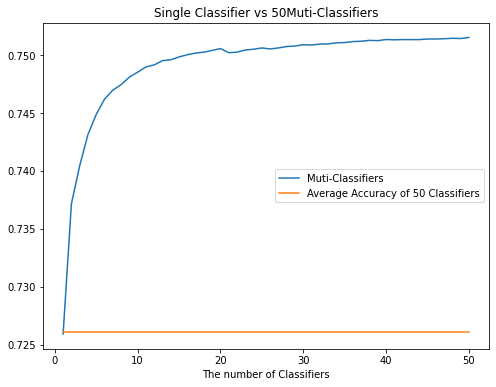

In [22]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.plot(np.arange(n_block)+1,accs,label='Muti-Classifiers')
plt.plot([1,n_block],[0.7260683000087738,0.7260683000087738],label='Average Accuracy of 50 Classifiers')
plt.legend()
plt.xlabel('The number of Classifiers')
plt.title('Single Classifier vs ' +str(n_block) +'Muti-Classifiers')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/RSP50/RSP50.png')

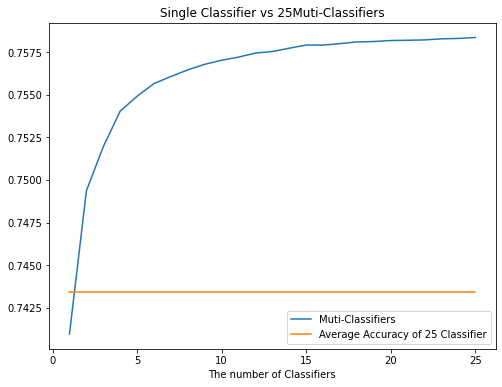

In [ ]:
# RSP 25

In [ ]:
# def Bagging(nets,n_block):
#   with torch.no_grad():
#     res=0
#     for i in range(n_block):
#         res+=(nets[i].compute(X_test_all))
#     return res